<a href="https://colab.research.google.com/github/rajaskakodkar/guitar-classifier/blob/master/guitar-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The 'Hello World' of Deep Learning in fastai

#### Installing fastai

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 1.0MB 20.3MB/s 
     |████████████████████████████████| 358kB 16.9MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 43.9MB/s 


#### Imports

In [ ]:
#hide
import fastbook
#fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

#### Getting the Data

urls=Array.from(document.querySelectorAll("a.iusc")).reduce((acc, el) => el.hasAttribute("m") ? acc.concat(JSON.parse(el.getAttribute("m")).murl) : acc, [])

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));



In [ ]:
guitar_types = 'acoustic', 'classical','electric' 
path = Path('data')

In [ ]:
path.mkdir(exist_ok=True)
for o in guitar_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    download_images(dest, url_file=Path(f'{o}.csv'))

#### Broken links

In [ ]:
fns = get_image_files(path);fns

(#571) [Path('data/acoustic/00000204.jpg'),Path('data/acoustic/00000045.jpg'),Path('data/acoustic/00000095.jpeg'),Path('data/acoustic/00000028.jpg'),Path('data/acoustic/00000162.jpg'),Path('data/acoustic/00000015.jpg'),Path('data/acoustic/00000195.jpg'),Path('data/acoustic/00000023.jpg'),Path('data/acoustic/00000149.jpg'),Path('data/acoustic/00000156.jpg')...]

In [ ]:
failed = verify_images(fns);failed

(#19) [Path('data/acoustic/00000122.jpg'),Path('data/acoustic/00000036.jpg'),Path('data/acoustic/00000031.jpg'),Path('data/acoustic/00000143.jpg'),Path('data/acoustic/00000007.jpg'),Path('data/classical/00000134.jpg'),Path('data/classical/00000158.jpg'),Path('data/classical/00000117.jpg'),Path('data/classical/00000115.jpg'),Path('data/classical/00000061.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#19) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
fns=get_image_files(path);fns

(#552) [Path('data/acoustic/00000204.jpg'),Path('data/acoustic/00000045.jpg'),Path('data/acoustic/00000095.jpeg'),Path('data/acoustic/00000028.jpg'),Path('data/acoustic/00000162.jpg'),Path('data/acoustic/00000015.jpg'),Path('data/acoustic/00000195.jpg'),Path('data/acoustic/00000023.jpg'),Path('data/acoustic/00000149.jpg'),Path('data/acoustic/00000156.jpg')...]

#### Data

In [ ]:
dls = ImageDataLoaders.from_path_func(path,fns,parent_label,valid_pct=0.2,seed=42,item_tfms=RandomResizedCrop(224,min_scale=0.8),batch_tfms=aug_transforms())

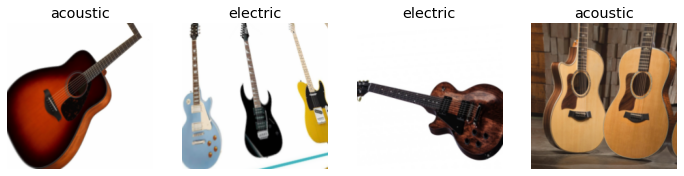

In [ ]:
dls.show_batch(max_n=4,nrows=1)

#### What is a Learner? 

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.245503,0.910997,0.236364,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.545278,0.662621,0.190909,00:36
1,0.443495,0.296243,0.063636,00:34
2,0.349819,0.432305,0.109091,00:35
3,0.300608,0.615372,0.118182,00:35
4,0.247185,0.735860,0.109091,00:35
5,0.224888,0.633031,0.090909,00:35
6,0.192826,0.567906,0.081818,00:35
7,0.164928,0.546344,0.081818,00:35


#### Cleaning Data

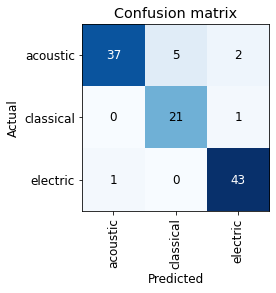

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

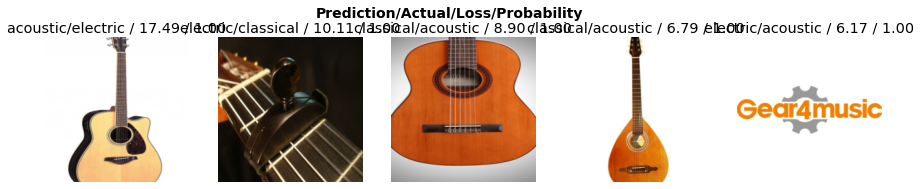

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
fns = get_image_files(path);fns

(#544) [Path('data/acoustic/00000204.jpg'),Path('data/acoustic/00000045.jpg'),Path('data/acoustic/00000095.jpeg'),Path('data/acoustic/00000028.jpg'),Path('data/acoustic/00000162.jpg'),Path('data/acoustic/00000015.jpg'),Path('data/acoustic/00000195.jpg'),Path('data/acoustic/00000149.jpg'),Path('data/acoustic/00000156.jpg'),Path('data/acoustic/00000056.jpg')...]

#### Training again

In [ ]:
fns = get_image_files(path)
dls = ImageDataLoaders.from_path_func(path,fns,parent_label,valid_pct=0.2,seed=42,item_tfms=RandomResizedCrop(224,min_scale=0.8),batch_tfms=aug_transforms())

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

In [ ]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.402163,0.578340,0.194444,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.504990,0.770969,0.185185,00:36
1,0.392142,0.688080,0.185185,00:35
2,0.329297,0.433437,0.111111,00:35
3,0.278042,0.618129,0.092593,00:34
4,0.250050,0.363403,0.074074,00:35
5,0.220381,0.450079,0.083333,00:35
6,0.187981,0.500583,0.074074,00:35
7,0.170198,0.498968,0.074074,00:34


In [ ]:
learn.export()

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(224,224))
out_pl


Output()

In [ ]:
learn.predict(img)

('acoustic', tensor(0), tensor([9.9984e-01, 1.8949e-05, 1.4296e-04]))